<a href="https://colab.research.google.com/github/LanesG/colab/blob/master/CNN_Dog_Races.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importieren der Libraries

In [0]:
%tensorflow_version 2.x

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Input, \
  Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt

In [0]:
if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. CNNs can be very slow without a GPU.\nGo to Runtime > Change runtime and select a GPU hardware accelerator.")

In [8]:
!pip install --upgrade deeplearning2020
from deeplearning2020 import helpers

     |████████████████████████████████| 399kB 13.8MB/s 
  Created wheel for deeplearning2020: filename=deeplearning2020-0.4.21-py2.py3-none-any.whl size=8548 sha256=aef0dc02acc12307047feba54a309377740deaccd0277f43f6febeb21b0153af
  Stored in directory: /root/.cache/pip/wheels/7f/c2/8a/f9f03fc839999f1fe9d5e5a9d2c97cdd5cb8329f61f82ea2c9
  Created wheel for kerasltisubmission: filename=kerasltisubmission-0.4.9-py2.py3-none-any.whl size=8867 sha256=15a8741015db0971ef2649b74e10f60b90709cf69a85c642e03c1b5998ce926f
  Stored in directory: /root/.cache/pip/wheels/fd/61/f7/09171376b25408ae21b58e98c9fbf2eb924f676bb77659f983
Successfully built deeplearning2020 kerasltisubmission


# Die Daten
## Laden der Daten

In [9]:
from deeplearning2020.datasets import ImageWoof

train_data, test_data, classes = ImageWoof.load_data()

328294400/328288506 [==============================] - 10s 0us/step
/root/.keras/datasets/imagewoof2-320/train
Loaded 9025 images
/root/.keras/datasets/imagewoof2-320/val
Loaded 3929 images


## Informationen über die Datensätze anzeigen
Die Bildpunkte sind als Floats zwischen 0 und 1 gespeichert.  
Die Labels der Daten liegen in sparse Form vor.

In [10]:
print("Trainingsdaten")
print(train_data)

print("Testdaten")
print(test_data)

Trainingsdaten
<ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
Testdaten
<ParallelMapDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>


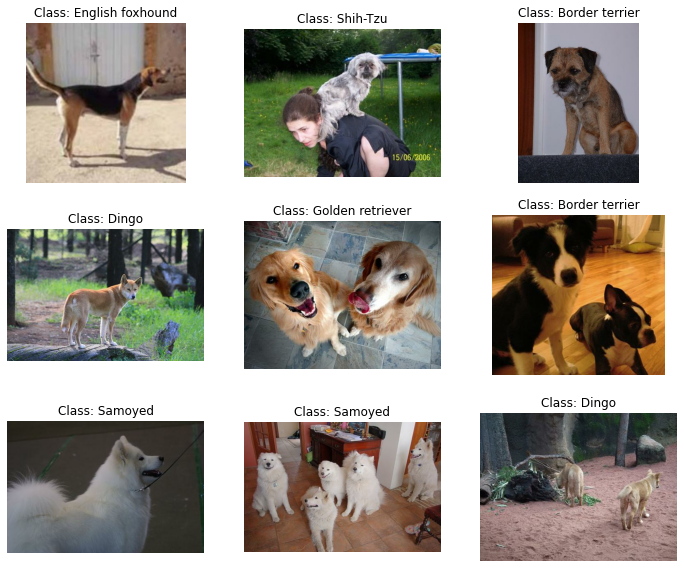

In [11]:
helpers.plot_images(train_data.take(9), classes)

## Preprocessing der Daten
Um mit den Bilddaten arbeiten zu können, müssen diese eine einheitliche Größe haben. Dafür steht die Funktion `preprocess` bereit, die alle Bilder in die vorgegebene Größe umwandelt.

In [0]:
def preprocess(image, label):
    resized_image = tf.image.resize(image, [300, 300])
    return resized_image, label

Anwendung der `preprocess` Funktion auf alle Daten.  
`.batch` bereitet den nächsten Batch mit festeglegter Größe vor.  
`.prefetch` lädt den nächsten Batch schon in den Speicher.

In [13]:
# Festlegung der Batch Größe für die Datenvorbereitung
batch_size = 32 

# Durchmischen der Trainingsdaten, dass nicht mit sortierten Bildern trainiert wird 

train_data = train_data.shuffle(1000) 

print('shape des Trainigsdatensatzes vor dem preprocessing: ', train_data)

train_data = train_data.map(preprocess) \
  .batch(batch_size).prefetch(1)          
test_data = test_data.map(preprocess) \
  .batch(batch_size).prefetch(1)

print('shape des Traingingsdatensatzes nach dem preprocessing: ', train_data)

shape des Trainigsdatensatzes vor dem preprocessing:  <ShuffleDataset shapes: ((None, None, 3), ()), types: (tf.float32, tf.int64)>
shape des Traingingsdatensatzes nach dem preprocessing:  <PrefetchDataset shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


# Das Netz

## Hyperparameter

In [0]:
learning_rate=0.001
momentum=0.9
dense_neurons=1000
n_filters=512
activation='elu'

## Die Layer

In [0]:
# Inputgröße muss 300x300 Pixel mit 3 RGB Farben betragen
input_layer = Input(shape=(300, 300, 3))

# Convolutional Neural Network
# 6 Convolutional Layers mit jeweils einer Max Pooling Layer
model = Conv2D(
    filters=64,
    kernel_size=(7,7),
    strides=(2,2),
    activation=activation,
    padding='same'
)(input_layer)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = 256, 
    kernel_size=(3,3), 
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(
    filters = n_filters, 
    kernel_size=(3,3), 
    activation=activation,
    padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

model = Conv2D(filters = n_filters, 
  kernel_size=(3,3), 
  activation=activation, 
  padding='same'
)(model)
model = MaxPooling2D((2,2))(model)

# Fully-Connected-Classifier
model = Flatten()(model)
model = Dense(
    dense_neurons,
    activation=activation
)(model)

model = Dense(
    dense_neurons / 2,
    activation='tanh'
)(model)

# Output Layer
output = Dense(10, activation="softmax")(model)

CNN_model = Model(input_layer, output)

In [22]:
CNN_model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 300, 300, 3)]     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 147, 147, 256)     37888     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 73, 73, 256)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 73, 73, 256)       590080    
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 36, 36, 256)       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 36, 36, 512)       1180160   
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 18, 18, 512)       0   

## Kompilieren des Netzes

In [0]:
optimizer = keras.optimizers.SGD(lr=learning_rate, momentum=momentum)
CNN_model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=optimizer,
    metrics=["accuracy"]
)

## Trainieren des Netzes

In [24]:
history = CNN_model.fit(
    train_data,
    epochs=12,
    validation_data=test_data
)

Epoch 1/12
283/283 [==============================] - 41s 145ms/step - loss: 2.1807 - accuracy: 0.1909 - val_loss: 2.0292 - val_accuracy: 0.2606
Epoch 2/12
283/283 [==============================] - 40s 141ms/step - loss: 2.0139 - accuracy: 0.2643 - val_loss: 1.9664 - val_accuracy: 0.2871
Epoch 3/12
283/283 [==============================] - 40s 142ms/step - loss: 1.9084 - accuracy: 0.3129 - val_loss: 1.8573 - val_accuracy: 0.3464
Epoch 4/12
283/283 [==============================] - 40s 141ms/step - loss: 1.8222 - accuracy: 0.3476 - val_loss: 1.8864 - val_accuracy: 0.3334
Epoch 5/12
283/283 [==============================] - 40s 141ms/step - loss: 1.7532 - accuracy: 0.3775 - val_loss: 1.7646 - val_accuracy: 0.3785
Epoch 6/12
283/283 [==============================] - 40s 141ms/step - loss: 1.6450 - accuracy: 0.4259 - val_loss: 1.7494 - val_accuracy: 0.3810
Epoch 7/12
283/283 [==============================] - 40s 142ms/step - loss: 1.5573 - accuracy: 0.4597 - val_loss: 1.8514 - val_ac

## Evaluieren des Netzes

In [19]:
helpers.plot_history('Accuracy', history, 0)

NameError: ignored